

# Project: No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Q1">Q.1 : The Waiting Period </a></li>
<li><a href="#Q2">Q.2 : The Message Recieved </a></li>
<li><a href="#Q3">Q.3 : The Hospital Traffic </a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment.

We will investigate in only 3 Factors (we Guess) that they affect why patient didn't show up proportionally

1 - The Waiting Period

2 - The Message Recieved

3- The Hospital Traffic

---
---

In [1]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will check for cleanliness, and then trim and clean our dataset for analysis.
### cleaning decisions :

1- Is there any Missing Data ? 

2- Is there any Duplicated Data ?

3- Is there any Data Type need to be Converted to a more convenient Data Type ?

4- Is there any Logically Wrong Data ? 


> We will try to investigate about that and handle it correctly in the next sections


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* No Missing Data (No Null Values found)

* Some Data Types need to be Converted to Another Data Type (ScheduledDay and AppointmentDay need to be converted to datetime )


In [4]:
df[["ScheduledDay","AppointmentDay"]].head(5)

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z



* in some data values : AppointmentDay is before ScheduledDay , so we will make  AppointmentDay = ScheduledDay  for those Values
---
---

In [5]:
# check for Duplicate rows

sum(df.duplicated())

0

* No Duplicates data found

In [6]:
# give most common Statistical analysis about our dataset
df["Age"].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

- Age Column Has Negative Values (look at the Min.), So we will take the absolute value of it.


#### As we can see Above :

1- No Missing Data (No Null Values found)

2- Some Data Types need to be Converted to Another Data Type ("ScheduledDay" and "AppointmentDay" need to be converted to datetime ) , ( "PatientId" Need to be converted to int64 )

3- Age Column Has Negative Values , So we will take the absolute value of it.

4- in some data values : AppointmentDay is before ScheduledDay , so we will make  AppointmentDay = ScheduledDay  for those Values (as if the Patient take the medical service at the same session)

5- No Duplicated data found


### Data Cleaning 

In [7]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.

#Some Data Types need to be Converted to Another Data Type (ScheduledDay and AppointmentDay need to be converted to datetime )
#"PatientId" Need to be converted to int64


df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

#df["PatientId"] = df["PatientId"].astype(np.int64)

# Age Column Has Negative Values , So we will take the absolute value of it.
# search in Age Column if Negative number is found , then take the absolute value

for everyage in df["Age"]:
    if everyage < 0 : 
      df["Age"] = df["Age"].abs()

    
#AppointmentDay is before ScheduledDay , so we will make AppointmentDay = ScheduledDay 

index = 0
for row in range(len(df)) :
    if  np.less( df["AppointmentDay"][index] , df["ScheduledDay"][index])   :    
        df["AppointmentDay"][index] = df["ScheduledDay"][index]
    index += 1    


#range(len(df))
df.head(3)

#type(df)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


<a id='eda'></a>

## Exploratory Data Analysis


We will investigate in only 2 Factors (we Guess) that they affect why patient didn't show up proportionally

1 - The Waiting Period

2 - The Message Recieved

3 - The Hospital Traffic


<a id='Q1'></a>

### 1- " The Waiting Period " :
#####  - how is The Waiting Period is affecting the percentage of the patients who show up if the Waiting Period are :

##### 1.1 - less than ~ 10 days   (~ Waiting Mean Value )  
##### 1.2 - greater than ~ 10 days (~ Waiting Mean Value )

___
___
___

#### a- Preaparing Data :

In [8]:
# creating a new data frame and append a new column "WaitingDays" to calculate the waiting period for every patient  
df_new = df

df_new["WaitingDays"] = df_new["AppointmentDay"] - df_new["ScheduledDay"]

df_new["WaitingDays"]= df_new["WaitingDays"].astype('timedelta64[D]')

df_new.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,34.0
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,34.0
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,40.0
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,40.0
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,40.0


#### b- Data Analyzing :

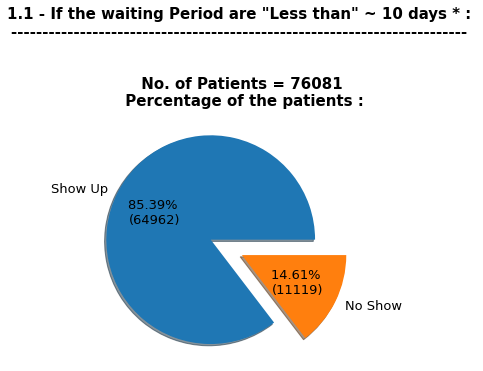


------------------------------------------------
 * : Waiting Period Average = 9.53


In [9]:
# percentage of the patients who show up if the waiting days are less than 10 days : 

waiting_mean = df_new["WaitingDays"].mean()


show_patients2 = 0
no_show_patients2 = 0

for row in range(len(df_new)) :
    if ( np.less_equal(df_new["WaitingDays"][row] , waiting_mean ) & (df_new["No-show"][row] == "No")) :
        show_patients2 += 1
    elif ( np.less_equal(df_new["WaitingDays"][row] , waiting_mean ) & (df_new["No-show"][row] == "Yes")) :
        no_show_patients2 += 1
        
        
show2={"Show Up":show_patients2,"No Show":no_show_patients2}

status2 = list(show2.keys())
count2 = list(show2.values())
explode = [0.4 , 0]
plt.pie(count2, labels = status2,autopct=lambda p: '{:.2f}% \n({:.0f})'.format(p,(p/100)*sum(count2)),explode = explode
        , textprops={'fontsize': 13},shadow = True,radius = 1.2)


plt.title('1.1 - If the waiting Period are "Less than" ~ 10 days * : '
          '\n------------------------------------------------------------------------- \n '
          '\n\n No. of Patients = {} \n Percentage of the patients :\n\n'.format(show_patients2+no_show_patients2),
          fontsize=15, fontweight ='bold')

plt.show()

print("\n------------------------------------------------\n * : Waiting Period Average = {:.2f}".format(waiting_mean))


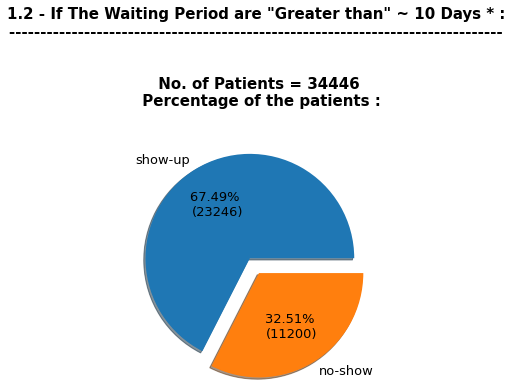


 ------------------------------------------------
 * : Waiting Period Average = 9.53


In [10]:
# percentage of the patients who show up if the waiting days are greater than 10 days :


show_patients1 = 0
no_show_patients1 = 0

for row in range(len(df_new)) :
    if ( np.greater(df_new["WaitingDays"][row] , waiting_mean ) & (df_new["No-show"][row] == "No")) :
        show_patients1 += 1
    elif ( np.greater(df_new["WaitingDays"][row] , waiting_mean ) & (df_new["No-show"][row] == "Yes")) :
        no_show_patients1 += 1

        
show1={"show-up":show_patients1,"no-show":no_show_patients1}

status1 = list(show1.keys())
count1 = list(show1.values())
explode = [0.2 , 0]
plt.pie(count1, labels = status1,autopct=lambda p: '{:.2f}% \n({:.0f})'.format(p,(p/100)*sum(count1)),explode = explode
        ,textprops={'fontsize': 13} ,shadow = True,radius = 1.2)

plt.title('1.2 - If The Waiting Period are "Greater than" ~ 10 Days * : '
          '\n------------------------------------------------------------------------------- \n '
          '\n\n No. of Patients = {} \n Percentage of the patients :\n\n\n'.format(show_patients1+no_show_patients1)
          ,fontsize=15, fontweight ='bold')

plt.show()

print("\n ------------------------------------------------\n * : Waiting Period Average = {:.2f}".format(waiting_mean))
        

<a id='Q2'></a>
--------------------------------------------------------------------------------------------------------------------------------
-------------------------
------------------------
### 2- The Message Recieved :

- how is The Recieved Message affects the percentage of the patients who show up , we have 2 Cases  :



#### 2.1 - If a patient did't recieve a message  

#### 2.2 - If a patient recieved a message

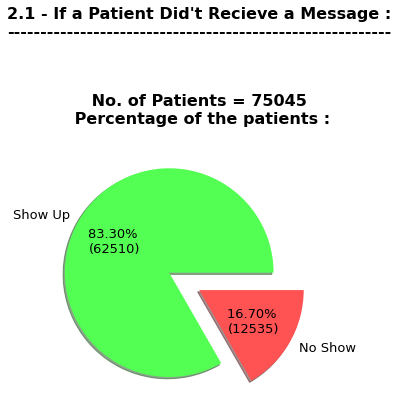

In [11]:

# calculating & Plotting the percentage of the patients who show up
# 2.1 - If a patient did't recieve a message  


def SMS_received_and_show( sms , no_show = "" ) :

    # sms = 1 if message recived , sms = 0 if no message 
    # no_show = "No" if a patient shows up , no_show = "Yes" if a patient no show
    
    count = len(df_new[(df_new["SMS_received"] == sms )& (df_new["No-show"]== no_show)])
    return count


patients1 = SMS_received_and_show( 0 ,"No" )

patients2 = SMS_received_and_show( 0 ,"Yes" )


total_1 =  patients1 + patients2


plt.pie([patients1,patients2], labels = ["Show Up","No Show"],
        autopct=lambda p: '{:.2f}% \n({:.0f})'.format(p,(p/100)*total_1),explode = [0.4,0],colors =['#52ff52','#ff5252']
       ,textprops={'fontsize': 13} ,shadow = True,radius = 1.2)


plt.title("2.1 - If a Patient Did't Recieve a Message :\n----------------------------------------------------------\n\n"
          '\n\n No. of Patients = {} \n Percentage of the patients :\n\n\n'.format(total_1)
          ,fontsize= 16,fontweight="bold")
 
plt.show()

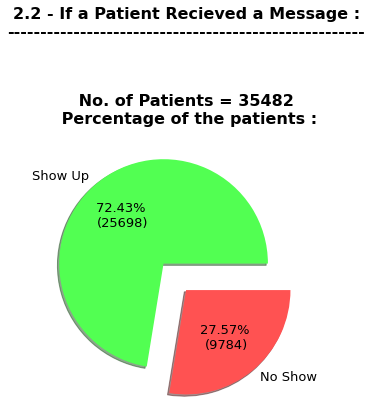

In [12]:


# calculating & Plotting the percentage of the patients who show up
# 2.2 - If a patient recieved a message  


patients3 = SMS_received_and_show( 1 ,"No" )

patients4 = SMS_received_and_show( 1 ,"Yes" )

total_2 = patients3 + patients4


plt.pie([patients3,patients4], labels = ["Show Up","No Show"],
        autopct=lambda p: '{:.2f}% \n({:.0f})'.format(p,(p/100)*total_2),explode = [0.4,0],colors =['#52ff52','#ff5252']
       ,textprops={'fontsize': 13} ,shadow = True,radius = 1.2)

plt.title("2.2 - If a Patient Recieved a Message :\n------------------------------------------------------\n\n"
          '\n\n No. of Patients = {} \n Percentage of the patients :\n\n\n'.format(total_2)
          ,fontsize= 16,fontweight="bold")

plt.show()

<a id='Q3'></a>

----
-----
## 3 - The Hospitals Traffic  :

in this section we will investigate the following :

- The Top 20 Most Crowded Hospitals

- The Top 20 Quietest Hospitals

- What is the most Crowded Hospital (has the highest number of Patients)

- What is the Quietest Hospital (has the lowest number of Patients)

In [13]:
x = df["Neighbourhood"].value_counts(ascending=False) #.to_frame()

#x.values[range(20)]

xpercent = x[range(len(x)-1)]*100/len(df)
Top_20_Crowded_percent=xpercent[range(20)].sum()
#Top_20_Crowded_percent

x_ascending = df["Neighbourhood"].value_counts(ascending=True)
xpercent_ascending = x_ascending[range(len(x)-1)]*100/len(df)

Top_20_Quietest_percent = xpercent_ascending[range(20)].sum()
#Top_20_Quietest_percent
#x_ascending.index[0] 


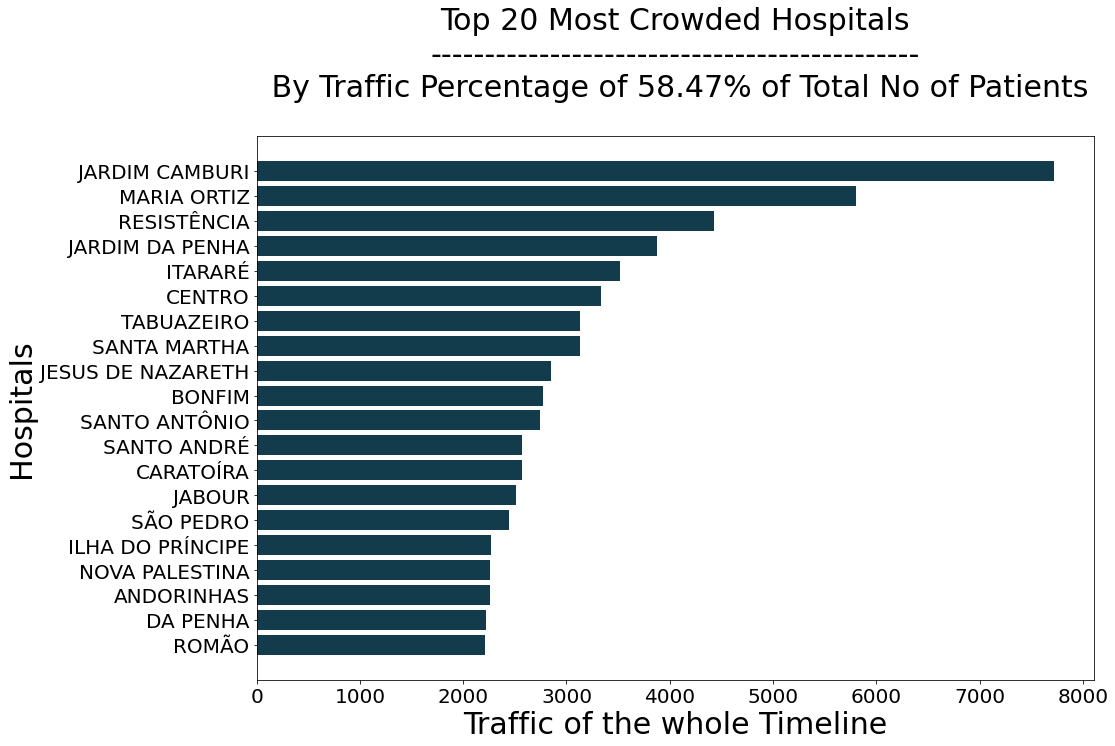

In [14]:

plt.rc('font', size=20) #set fontsize of all elements to  20
plt.figure(figsize = (15,10)) ;
plt.gca().invert_yaxis();


plt.barh(x.index[range(20)],x.values[range(20)], align='center',color='#123B4C');

plt.xlabel('Traffic of the whole Timeline',fontsize=30)
plt.ylabel('Hospitals',fontsize=30)
plt.title("Top 20 Most Crowded Hospitals\n---------------------------------------------\n By Traffic Percentage of {:.2f}% of Total No of Patients\n".format(Top_20_Crowded_percent),
          fontsize= 30 ) # fontweight='bold'
plt.show()

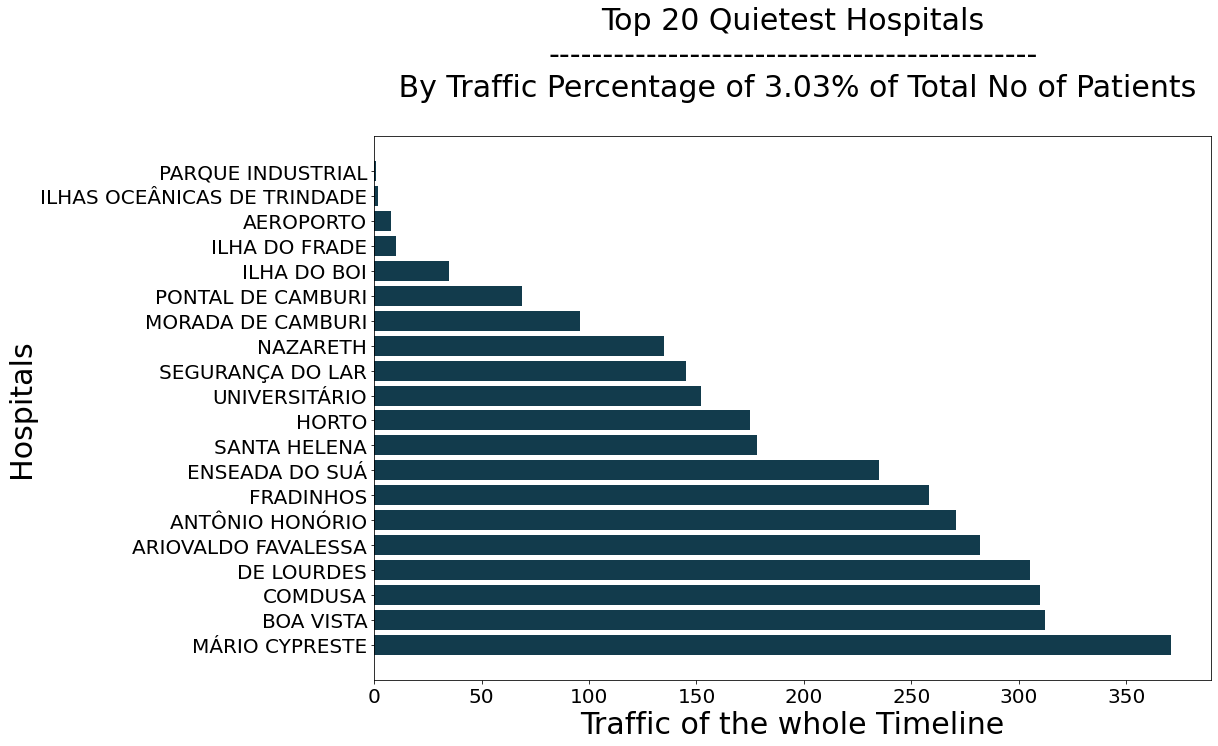

In [15]:
#fig, ax = plt.subplots()

plt.rc('font', size=20) #set fontsize of all elements to  20
plt.figure(figsize = (15,10)) 
plt.gca().invert_yaxis()


plt.barh(x_ascending.index[range(20)],x_ascending.values[range(20)], align='center',color='#123B4C');

#ax.set_yticks(y_pos, labels=people)
# matplotlib.invert_yaxis()  # labels read top-to-bottom

#ax.bar_label(hbars, labels=['%.2f' % e for e in xpercent], padding=8, color='b', fontsize=14)
plt.xlabel('Traffic of the whole Timeline',fontsize=30)
plt.ylabel('Hospitals',fontsize=30)
plt.title("Top 20 Quietest Hospitals\n---------------------------------------------\n "
          "By Traffic Percentage of {:.2f}% of Total No of Patients\n".format(Top_20_Quietest_percent),
          fontsize= 30 ) # fontweight='bold'

plt.show()

<a id='conclusions'></a>
## Conclusions


##### 1- for the first Question : "The Waiting Period" we found that :
 - about 14.6 % of the patients will no show up if the Waiting Period is Less than  ~ 10 days
 - about 32.5 % of the patients will no show up if the Waiting Period Exceeded ~ 10 days
> ##### " then if we decrease the Waiting Period ; the percentage of patient who will not show up will decrease significantly "
---
---

##### 2- for the Second Question : " The Recieved Message"  we found that :

- about 16.7 % of the patients who didn't Recieve a Message will no show up     

- about 27.57 % of the patients who Recieved a Message will no show up
 
 > ##### " this in fact shows that Recieving a message has NO significant effect on the Percentage of No-show Patients."

----
----

##### 3- for the third Question : "The Hospitals Traffic" we found that :

- The Most Crowded Hospital Is "JARDIM CAMBURI" By a Number of Patients of 7717 patient through All the Timeline



- The Quietest Hospital Is "PARQUE INDUSTRIAL" By a Number of Patients of 1  patient only through All the Timeline

>##### if the Quietest Hospitals are not so far from the Crowded one : we can refer some of the Patients of the crowded hospitals to one of the nearest Quietest Hospitals to Decrease the Patients Waiting Period , then ; the Number of people who show-up will increase
----
----

### Limitations :

We cannot be sure about the effect of the recieved message because we don't have any feedback that says if a patient read it or not?  

so it's better to make a call rather than sending a message 
or we can use social media messaging services along with Chat BOTs to automate the process for managing large patients Numbers 

if we do this surely the number of patients who show up will increase significantly , because we assume that the patient has forget the Appointment Date , and we help him remember it.


### Additional Research:

If there is a data to clarify that a patient has an urgent Health Situation or Not ; this data would be useful to know if the patient encountered a long Waiting Period and has an urgent situation , then he may go to another hospital
if he has a moderate health situation he may wait .
### Note :

This Analysis does not state or imply that one change causes another based solely on a correlation.
and all of the findings are tentative
